In [1]:
import numpy as np # for linear algebra
import pandas as pd 

In [2]:
df = pd.read_csv("continuous_factory_process.csv")
df.head(10) #view the first 10 rows of the data

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
5,2019-03-06 10:52:38,17.24,23.53,11.54,200,963.0,247,1262.73,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.0,247,1306.38,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.0,247,1296.13,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
8,2019-03-06 10:52:41,17.24,23.53,11.54,200,963.0,247,1251.11,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
9,2019-03-06 10:52:42,17.24,23.53,11.54,200,963.0,247,1202.16,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [3]:
#view the shape of the dataframe
df.shape

(14088, 116)

In [4]:
#view the data types of each column
df.dtypes

time_stamp                                        object
AmbientConditions.AmbientHumidity.U.Actual       float64
AmbientConditions.AmbientTemperature.U.Actual    float64
Machine1.RawMaterial.Property1                   float64
Machine1.RawMaterial.Property2                     int64
                                                  ...   
Stage2.Output.Measurement12.U.Setpoint           float64
Stage2.Output.Measurement13.U.Actual             float64
Stage2.Output.Measurement13.U.Setpoint           float64
Stage2.Output.Measurement14.U.Actual             float64
Stage2.Output.Measurement14.U.Setpoint           float64
Length: 116, dtype: object

In [5]:
#view the summary statistics of the data
df.describe

<bound method NDFrame.describe of                 time_stamp  AmbientConditions.AmbientHumidity.U.Actual  \
0      2019-03-06 10:52:33                                       17.24   
1      2019-03-06 10:52:34                                       17.24   
2      2019-03-06 10:52:35                                       17.24   
3      2019-03-06 10:52:36                                       17.24   
4      2019-03-06 10:52:37                                       17.24   
...                    ...                                         ...   
14083  2019-03-06 14:47:16                                       13.84   
14084  2019-03-06 14:47:17                                       13.84   
14085  2019-03-06 14:47:18                                       13.84   
14086  2019-03-06 14:47:19                                       13.84   
14087  2019-03-06 14:47:20                                       13.84   

       AmbientConditions.AmbientTemperature.U.Actual  \
0                    

Data Preprocessing

In [6]:
#detecting missing values
df.isnull().sum()

time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [14]:
from scipy.stats import zscore
df_new = df.iloc[:,1:].apply(zscore)
df = pd.concat([df.iloc[:, 0], df_new], axis=1)
df.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,-0.015695,-0.210989,0.706117,...,-4.579107,NaN,-4.581373,NaN,-4.758606,NaN,-7.41442,NaN,-3.608272,NaN
1,2019-03-06 10:52:34,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.034700,-0.210989,0.706117,...,-4.579107,NaN,-4.581373,NaN,-4.758606,NaN,-7.41442,NaN,-3.608272,NaN
2,2019-03-06 10:52:35,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.036787,-0.210989,0.706117,...,-4.579107,NaN,-4.581373,NaN,-4.758606,NaN,-7.41442,NaN,-3.608272,NaN
3,2019-03-06 10:52:36,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.050351,-0.210989,0.706117,...,-4.579107,NaN,-4.581373,NaN,-4.758606,NaN,-7.41442,NaN,-3.608272,NaN
4,2019-03-06 10:52:37,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.105024,1.371772,0.952242,...,-4.579107,NaN,-4.581373,NaN,-4.758606,NaN,-7.41442,NaN,-3.608272,NaN


In [15]:
#Stage1
s1_X = df.filter(regex='Ambient|Machine1|Machine2|Machine3|FirstStage')
s1_y = df.filter(regex='Stage1.*Actual')

#Stage2
s2_X = df.filter(regex='Ambient|Stage1.*Actual|Machine4|Machine5')
s2_y = df.filter(regex='Stage2.*Actual')

print("Stage1_X Columns: ", s1_X.columns)
print("Stage1_y Columns: ", s1_y.columns)
print("Stage2_X Columns: ", s2_X.columns)
print("Stage2_y Columns: ", s2_y.columns)

Stage1_X Columns:  Index(['AmbientConditions.AmbientHumidity.U.Actual',
       'AmbientConditions.AmbientTemperature.U.Actual',
       'Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2',
       'Machine1.RawMaterial.Property3', 'Machine1.RawMaterial.Property4',
       'Machine1.RawMaterialFeederParameter.U.Actual',
       'Machine1.Zone1Temperature.C.Actual',
       'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual',
       'Machine1.MotorRPM.C.Actual', 'Machine1.MaterialPressure.U.Actual',
       'Machine1.MaterialTemperature.U.Actual',
       'Machine1.ExitZoneTemperature.C.Actual',
       'Machine2.RawMaterial.Property1', 'Machine2.RawMaterial.Property2',
       'Machine2.RawMaterial.Property3', 'Machine2.RawMaterial.Property4',
       'Machine2.RawMaterialFeederParameter.U.Actual',
       'Machine2.Zone1Temperature.C.Actual',
       'Machine2.Zone2Temperature.C.Actual', 'Machine2.MotorAmperage.U.Actual',
       'Machine2.MotorRPM.C.Actual', 'Mac

In [16]:
s1_df = pd.concat([df.iloc[:, 0], s1_X, s1_y], axis=1)
s2_df = pd.concat([df.iloc[:, 0], s2_X, s2_y], axis=1)

print("Stage1 Dataframe Columns: ", s1_df.columns)
print("Stage2 Dataframe Columns: ", s2_df.columns)

Stage1 Dataframe Columns:  Index(['time_stamp', 'AmbientConditions.AmbientHumidity.U.Actual',
       'AmbientConditions.AmbientTemperature.U.Actual',
       'Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2',
       'Machine1.RawMaterial.Property3', 'Machine1.RawMaterial.Property4',
       'Machine1.RawMaterialFeederParameter.U.Actual',
       'Machine1.Zone1Temperature.C.Actual',
       'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual',
       'Machine1.MotorRPM.C.Actual', 'Machine1.MaterialPressure.U.Actual',
       'Machine1.MaterialTemperature.U.Actual',
       'Machine1.ExitZoneTemperature.C.Actual',
       'Machine2.RawMaterial.Property1', 'Machine2.RawMaterial.Property2',
       'Machine2.RawMaterial.Property3', 'Machine2.RawMaterial.Property4',
       'Machine2.RawMaterialFeederParameter.U.Actual',
       'Machine2.Zone1Temperature.C.Actual',
       'Machine2.Zone2Temperature.C.Actual', 'Machine2.MotorAmperage.U.Actual',
       'Machine2.Mo

In [18]:
# Stage1 Dataframe with Shape
print(s1_df.shape)
s1_df.head()

(14088, 57)


,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,2019-03-06 10:52:33,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,-0.015695,-0.210989,0.706117,...,-0.217887,2.185634,1.300991,0.222711,-0.158671,0.348406,1.591748,0.688794,-0.203169,0.616142
1,2019-03-06 10:52:34,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.034700,-0.210989,0.706117,...,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
2,2019-03-06 10:52:35,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.036787,-0.210989,0.706117,...,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
3,2019-03-06 10:52:36,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.050351,-0.210989,0.706117,...,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
4,2019-03-06 10:52:37,1.60582,-0.83967,-0.609957,-0.489089,0.089376,-0.566726,0.105024,1.371772,0.952242,...,-0.217887,2.229663,-0.778312,-4.127119,-0.158671,-0.130660,1.438364,-0.079679,-0.171288,-1.340365


In [19]:
# Stage2 Dataframe with Shape
print(s2_df.shape)
s2_df.head()

(14088, 47)


,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,...,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
0,2019-03-06 10:52:33,1.60582,-0.83967,-0.189381,-1.166049,0.762615,0.305184,-8.495838,-0.217887,2.185634,...,-7.009478,-2.599566,-5.624379,-3.653117,-1.530689,-4.579107,-4.581373,-4.758606,-7.41442,-3.608272
1,2019-03-06 10:52:34,1.60582,-0.83967,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,...,-7.009478,-2.599566,-5.624379,-3.653117,-1.530689,-4.579107,-4.581373,-4.758606,-7.41442,-3.608272
2,2019-03-06 10:52:35,1.60582,-0.83967,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,...,-7.009478,-2.599566,-5.624379,-3.653117,-1.530689,-4.579107,-4.581373,-4.758606,-7.41442,-3.608272
3,2019-03-06 10:52:36,1.60582,-0.83967,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,...,-7.009478,-2.599566,-5.624379,-3.653117,-1.530689,-4.579107,-4.581373,-4.758606,-7.41442,-3.608272
4,2019-03-06 10:52:37,1.60582,-0.83967,-0.649670,-1.166049,-10.788041,-1.656547,-0.371201,-0.217887,2.229663,...,-7.009478,-2.599566,-5.624379,-3.653117,-1.530689,-4.579107,-4.581373,-4.758606,-7.41442,-3.608272


In [20]:
X = s1_X
y = s1_y

In [21]:
X

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual
0,1.605820,-0.839670,-0.609957,-0.489089,0.089376,-0.566726,-0.015695,-0.210989,0.706117,-4.036747,...,2.495960,3.440612,-0.849538,0.530021,2.770346,-4.295091,-0.131844,-1.731669,1.254217,-0.031391
1,1.605820,-0.839670,-0.609957,-0.489089,0.089376,-0.566726,0.034700,-0.210989,0.706117,-4.036747,...,1.194276,3.440612,-0.359309,0.737118,2.634767,-4.295091,-0.131844,-1.731669,1.308043,-0.031391
2,1.605820,-0.839670,-0.609957,-0.489089,0.089376,-0.566726,0.036787,-0.210989,0.706117,-4.013217,...,1.194276,4.311560,-0.705224,1.680560,2.593930,-4.295091,-0.131844,-1.643481,1.404928,-0.031391
3,1.605820,-0.839670,-0.609957,-0.489089,0.089376,-0.566726,0.050351,-0.210989,0.706117,-3.939010,...,1.194276,4.311560,-0.656752,0.921204,2.526957,-4.246506,-0.131844,-1.643481,1.308043,-0.031391
4,1.605820,-0.839670,-0.609957,-0.489089,0.089376,-0.566726,0.105024,1.371772,0.952242,-3.939010,...,-0.107407,4.311560,-0.888096,1.036258,2.518790,-4.246506,-0.131844,-1.643481,1.340338,-0.031391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,-1.253844,1.569828,0.722616,-0.402926,0.760951,0.949480,0.219065,-0.210989,-0.524505,0.565951,...,-0.107407,0.827770,-0.838522,-2.829553,0.233547,0.369121,-1.733442,1.143284,1.162715,-0.031391
14084,-1.253844,1.569828,0.722616,-0.402926,0.760951,0.949480,0.132047,-0.210989,-0.524505,0.540611,...,-0.107407,0.827770,-0.295414,-2.185251,0.236814,0.369121,-1.733442,1.619504,1.211157,-0.031391
14085,-1.253844,1.569828,0.722616,-0.402926,0.760951,0.949480,0.153958,-0.210989,-0.524505,0.589480,...,-0.107407,0.827770,-1.126049,-2.507402,0.354425,0.369121,-1.733442,1.619504,1.243452,-0.031391
14086,-1.253844,1.569828,0.722616,-0.402926,0.760951,0.949480,0.200597,-0.210989,-0.278381,0.736086,...,-0.107407,0.827770,-0.339480,-2.300305,0.241714,0.369121,-1.733442,1.619504,1.254217,-0.031391


In [22]:
y

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,-0.189381,-1.166049,0.762615,0.305184,-8.495838,-0.217887,2.185634,1.300991,0.222711,-0.158671,0.348406,1.591748,0.688794,-0.203169,0.616142
1,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
2,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
3,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
4,-0.649670,-1.166049,-10.788041,-1.656547,-0.371201,-0.217887,2.229663,-0.778312,-4.127119,-0.158671,-0.130660,1.438364,-0.079679,-0.171288,-1.340365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,-0.307129,-1.166049,-2.106052,0.082475,-0.342775,-0.217887,0.671036,1.364643,0.235246,0.234453,-0.075383,-0.587083,0.327159,0.561979,-1.340365
14084,-0.307129,-1.166049,-2.106052,0.082475,-0.342775,-0.217887,0.671036,1.364643,0.235246,0.234453,-0.075383,-0.587083,0.327159,0.561979,-1.340365
14085,-0.307129,-1.166049,-2.106052,0.082475,-0.342775,-0.217887,0.671036,1.364643,0.235246,0.234453,-0.075383,-0.587083,0.327159,0.561979,-1.340365
14086,-0.339242,-1.166049,-2.248535,0.243583,-0.342775,-0.217887,0.627007,1.279773,0.241514,0.208245,-0.020106,-0.587083,0.297023,0.445082,-1.340365


In [23]:
# covariance matrix

In [24]:
cov_mat = np.cov(X.T)
print("Covariance Matrix \n", cov_mat)

Covariance Matrix 
 [[ 1.00007099 -0.19741525 -0.63500982 ... -0.8143576  -0.70961579
  -0.00334941]
 [-0.19741525  1.00007099  0.26091502 ...  0.477769    0.30485235
   0.00755165]
 [-0.63500982  0.26091502  1.00007099 ...  0.70615909  0.62706273
   0.00695997]
 ...
 [-0.8143576   0.477769    0.70615909 ...  1.00007099  0.82342922
   0.00387866]
 [-0.70961579  0.30485235  0.62706273 ...  0.82342922  1.00007099
   0.0166001 ]
 [-0.00334941  0.00755165  0.00695997 ...  0.00387866  0.0166001
   1.00007099]]


In [25]:
# finding eigen values and eigen vectors for applying PCA to reduce dimensionality
eigen_val, eigen_vec = np.linalg.eig(cov_mat)
print("Eigen vectors \n", eigen_vec)
print("Eigen values \n", eigen_val)

Eigen vectors 
 [[ 2.68916877e-01  4.03143795e-02 -6.75377416e-02 ...  1.67308546e-14
   4.15838973e-14 -4.40079641e-14]
 [-6.03301334e-02 -1.84566250e-01  1.93950208e-01 ...  2.86775289e-16
   5.03231775e-15 -6.46635422e-15]
 [-1.91970626e-01 -1.71216992e-01 -1.99049372e-01 ... -1.13961925e-14
  -3.89371498e-14  4.79252314e-14]
 ...
 [-2.26890525e-01 -1.65749217e-01  4.72155275e-02 ...  9.39712697e-16
   4.98759030e-16 -4.10317576e-16]
 [-1.78736386e-01 -2.34173738e-01  1.55691482e-02 ...  1.80508952e-15
   1.57836877e-16 -9.01034320e-17]
 [ 1.05858495e-03 -9.84753847e-03  4.86467729e-03 ...  1.49162291e-16
   4.39715932e-17 -4.41955135e-17]]
Eigen values 
 [ 1.26914243e+01  5.63957210e+00  3.34691274e+00  2.42490499e+00
  1.63974326e+00  1.33578924e+00  1.11149604e+00  1.08242842e+00
  1.02447462e+00  9.97949559e-01  1.00423831e+00  9.73564133e-01
  9.53176080e-01  8.79363609e-01  8.13622870e-01  7.82008120e-01
  6.68946332e-01  6.54374345e-01  6.24861755e-01  4.93329552e-01
  3.6504

In [26]:
tot = sum(eigen_val)
var_exp = [(i/tot)*100 for i in sorted(eigen_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance: \n", cum_var_exp)

Cumulative Variance: 
 [ 30.9524962   44.70657374  52.8691961   58.7831787   62.78226862
  66.0400599   68.75083343  71.39071534  73.88925657  76.33844444
  78.77229498  81.1466731   83.47132779  85.61596483  87.60027
  89.50747149  91.13893209  92.73485379  94.25879867  95.46195607
  96.36049394  97.25078996  97.90189463  98.33653698  98.72545439
  99.07620673  99.32414786  99.50015238  99.62873707  99.73817339
  99.82007612  99.89240481  99.93587619  99.96829219  99.99787554
 100.         100.         100.         100.         100.
 100.        ]


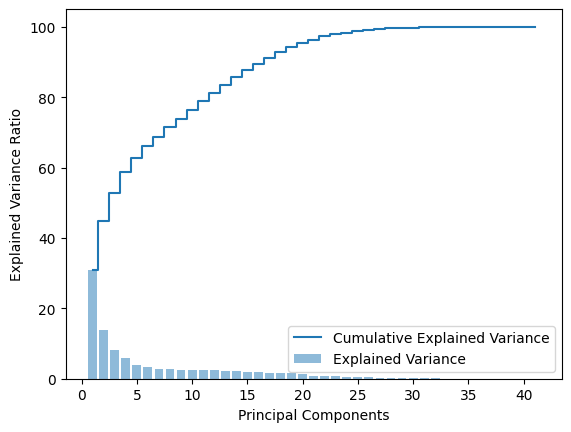

In [29]:
plt.bar(range(1, eigen_val.size+1), var_exp, alpha=0.5, align='center', label='Explained Variance')
plt.step(range(1, eigen_val.size+1), cum_var_exp, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='lower right')
plt.show()

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)
reduced_feat = pca.fit_transform(X)
reduced_feat.transpose()

array([[ 7.58091671e+00,  7.56860787e+00,  7.75754117e+00, ...,
        -4.49860891e+00, -4.31731509e+00, -4.03326084e+00],
       [ 5.83846311e+00,  5.56004704e+00,  5.87463167e+00, ...,
         4.42151711e-01,  3.34045962e-01,  3.98986096e-01],
       [ 5.18351171e+00,  5.20992159e+00,  5.55833676e+00, ...,
        -3.76914844e+00, -3.62638102e+00, -3.68266918e+00],
       ...,
       [ 1.89628702e-01,  1.92329912e-01,  5.62169959e-01, ...,
        -1.07407550e-02, -2.36274822e-02,  4.00706322e-03],
       [-6.56541331e-01, -6.40435786e-01, -8.57685706e-01, ...,
         2.20085313e-02, -1.93930711e-01, -2.25513317e-02],
       [-2.59421316e-01, -2.31983438e-01, -4.18160638e-01, ...,
        -3.86591002e-03, -6.12166040e-02,  5.97980295e-02]])

In [33]:
pca.components_

array([[ 2.68916877e-01, -6.03301334e-02, -1.91970626e-01, ...,
        -2.26890525e-01, -1.78736386e-01,  1.05858495e-03],
       [-4.03143795e-02,  1.84566250e-01,  1.71216992e-01, ...,
         1.65749217e-01,  2.34173738e-01,  9.84753847e-03],
       [ 6.75377416e-02, -1.93950208e-01,  1.99049372e-01, ...,
        -4.72155275e-02, -1.55691482e-02, -4.86467729e-03],
       ...,
       [-2.99625065e-03,  1.64156605e-01, -3.38460950e-03, ...,
        -1.17942015e-01, -1.18610169e-02, -2.54752782e-03],
       [ 3.67135125e-01,  8.93751160e-02, -8.65757922e-02, ...,
        -4.13580526e-02,  2.83906446e-01,  7.53761721e-04],
       [-5.71376490e-01, -2.49147279e-02,  4.40040688e-02, ...,
         1.69343825e-04, -2.04633875e-01, -3.41471513e-03]])

In [37]:
def getPCAMostImpFeat(model, initial_feat_names):
    n_pcs = model.components_.shape[0]
    most_imp = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    most_imp_names = [initial_feat_names[most_imp[i]] for i in range(n_pcs)]
    
    #create dictionary with index number and corresponding column name
    dic = {'PC{}'.format(i): most_imp_names[i] for i in range(n_pcs)}
    df = pd.DataFrame(dic.items())
    return df

In [38]:
pca_df = getPCAMostImpFeat(pca, X.columns)
pca_df

,0,1
0,PC0,AmbientConditions.AmbientHumidity.U.Actual
1,PC1,Machine3.MotorAmperage.U.Actual
2,PC2,Machine1.MaterialTemperature.U.Actual
3,PC3,Machine2.MaterialTemperature.U.Actual
4,PC4,AmbientConditions.AmbientTemperature.U.Actual
5,PC5,Machine2.RawMaterialFeederParameter.U.Actual
6,PC6,Machine3.Zone2Temperature.C.Actual
7,PC7,Machine2.Zone1Temperature.C.Actual
8,PC8,Machine1.Zone2Temperature.C.Actual
9,PC9,Machine2.ExitZoneTemperature.C.Actual


In [39]:
final_df = pd.DataFrame(pca.components_, columns=list(X))
final_df.head()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual
0,0.268917,-0.060330,-0.191971,-0.170137,0.090727,-0.194451,0.027643,0.102187,0.006711,0.114936,...,0.058324,0.026370,0.007996,0.225794,-0.112106,-0.211213,0.045285,-0.226891,-0.178736,0.001059
1,-0.040314,0.184566,0.171217,0.190210,-0.191406,0.192680,-0.009354,0.135619,0.017322,-0.156424,...,0.092271,0.044467,-0.306440,-0.039198,-0.235626,-0.240991,0.068749,0.165749,0.234174,0.009848
2,0.067538,-0.193950,0.199049,0.294817,-0.295606,0.196739,0.039256,-0.027315,0.018412,-0.328047,...,0.089002,0.054934,0.225644,0.182764,0.185422,0.010959,0.109219,-0.047216,-0.015569,-0.004865
3,-0.052226,-0.144422,-0.099194,-0.186467,0.234750,-0.146259,-0.136727,0.267311,0.061505,-0.196070,...,0.250422,0.151207,0.135560,-0.133887,0.293286,-0.135070,0.185184,0.037663,0.260590,0.009786
4,0.067541,0.447332,-0.003513,0.069209,-0.176033,0.147029,-0.197746,0.095300,-0.004314,0.069110,...,-0.000829,-0.013009,0.214991,-0.241930,0.158026,-0.059297,0.080926,0.165476,0.058537,0.013781


In [40]:
final_df.shape

(33, 41)

<AxesSubplot: >

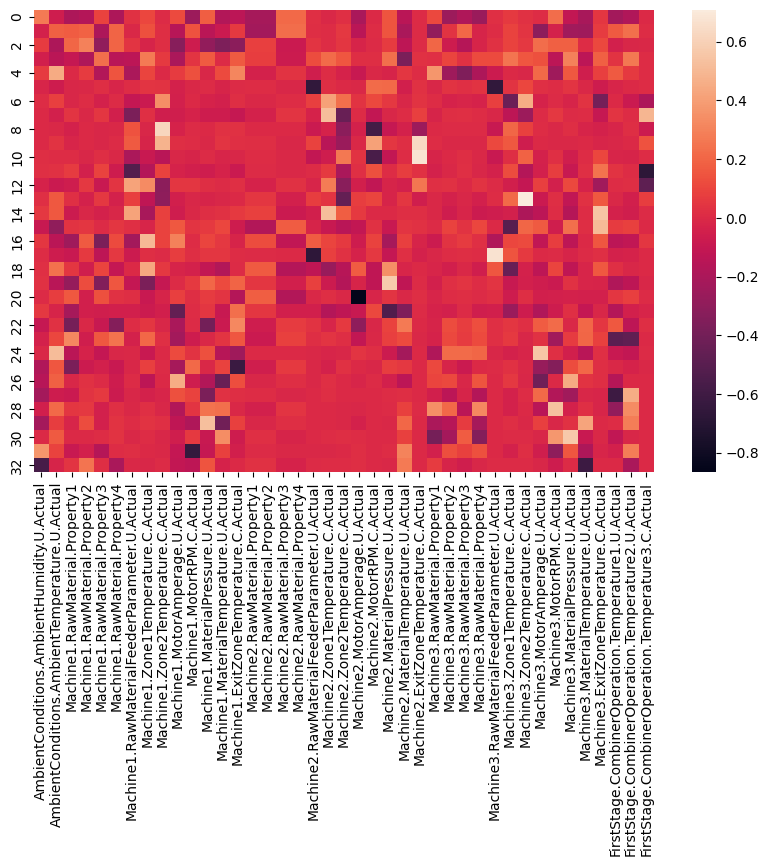

In [44]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(final_df)

In [45]:
reduced_feat.shape

(14088, 33)

In [46]:
red_feat_2 = pd.DataFrame(reduced_feat)
red_feat_2.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,7.580917,5.838463,5.183512,9.328219,-1.090093,2.810507,4.031696,3.035163,1.014122,-0.344358,...,-0.203044,1.061488,0.034949,2.791330,-0.467581,-0.703291,0.275556,0.189629,-0.656541,-0.259421
1,7.568608,5.560047,5.209922,8.986101,-1.153828,1.454145,4.510017,2.968026,0.820022,-0.682544,...,-0.304931,1.336057,-0.225875,2.421448,-0.298510,-0.579376,0.358246,0.192330,-0.640436,-0.231983
2,7.757541,5.874632,5.558337,9.137453,-1.501124,0.976459,5.026788,3.077217,1.537979,-1.327356,...,-0.582166,1.017352,-0.433265,2.627964,-0.310469,-0.160616,0.014812,0.562170,-0.857686,-0.418161
3,7.969219,5.997518,5.246651,9.287871,-1.187368,2.346171,5.183862,2.816823,0.701193,-1.129190,...,-0.198706,0.991667,-0.151983,2.480331,-0.383744,-0.444628,0.393119,0.194267,-0.674794,-0.269244
4,7.903628,6.247508,5.204150,9.393540,-1.107512,2.738004,5.789155,3.292264,0.826329,-1.477225,...,-0.050215,0.729356,-0.042059,2.361548,-0.224244,-0.390241,0.005758,0.311968,-0.636512,-0.459251


<AxesSubplot: >

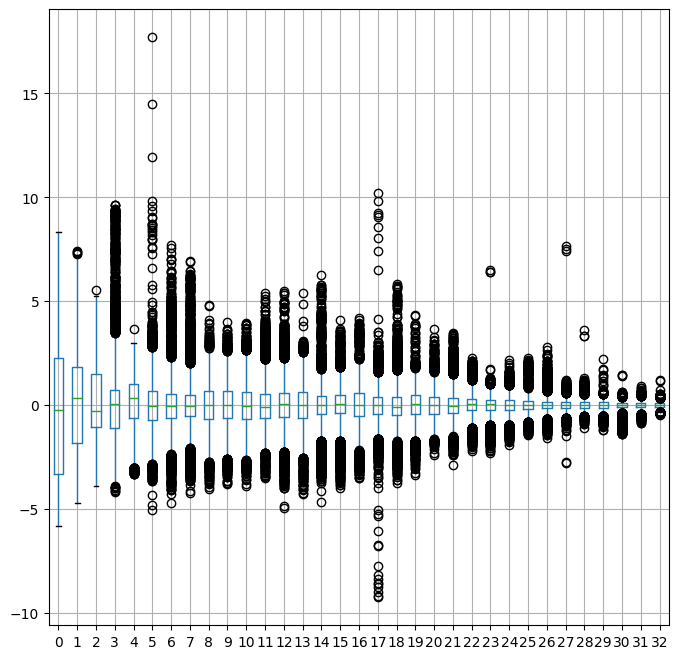

In [50]:
red_feat_2.boxplot(figsize=(8,8))

In [52]:
red_df = red_feat_2.copy()

from scipy import stats
def outlier_rem_max(var):
    var = np.where(var>var.quantile(0.75) + stats.iqr(var), var.quantile(0.50), var)
    return var

def outlier_rem_min(var):
    var = np.where(var<var.quantile(0.25) - stats.iqr(var), var.quantile(0.50), var)
    return var

for col in red_df:
    red_df[col] = outlier_rem_max(red_df[col])
    red_df[col] = outlier_rem_min(red_df[col])

<AxesSubplot: >

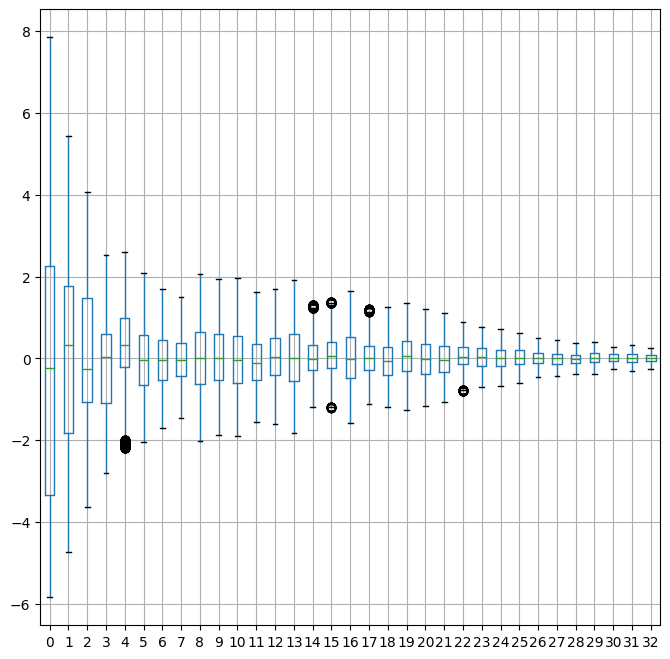

In [53]:
red_df.boxplot(figsize=(8,8))

In [55]:
col_names = pca_df[1].to_list()
red_df.columns = col_names
red_df

,AmbientConditions.AmbientHumidity.U.Actual,Machine3.MotorAmperage.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine2.MaterialTemperature.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine2.RawMaterialFeederParameter.U.Actual,Machine3.Zone2Temperature.C.Actual,Machine2.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine2.ExitZoneTemperature.C.Actual,...,FirstStage.CombinerOperation.Temperature1.U.Actual,Machine3.MotorAmperage.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine1.MotorAmperage.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,Machine3.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine3.MaterialPressure.U.Actual,Machine1.MotorRPM.C.Actual,Machine3.MaterialTemperature.U.Actual
0,7.580917,0.330668,-0.266219,0.041933,-1.090093,-0.039930,-0.042180,-0.034728,1.014122,-0.344358,...,-0.203044,0.012964,0.034949,0.005563,-0.000129,-0.008466,0.275556,0.189629,0.002351,0.008282
1,7.568608,0.330668,-0.266219,0.041933,-1.153828,1.454145,-0.042180,-0.034728,0.820022,-0.682544,...,-0.304931,0.012964,-0.225875,0.005563,-0.298510,-0.008466,0.358246,0.192330,0.002351,-0.231983
2,7.757541,0.330668,-0.266219,0.041933,-1.501124,0.976459,-0.042180,-0.034728,1.537979,-1.327356,...,-0.582166,0.012964,-0.433265,0.005563,-0.310469,-0.160616,0.014812,0.014197,0.002351,0.008282
3,-0.238728,0.330668,-0.266219,0.041933,-1.187368,-0.039930,-0.042180,-0.034728,0.701193,-1.129190,...,-0.198706,0.012964,-0.151983,0.005563,-0.383744,-0.008466,0.393119,0.194267,0.002351,0.008282
4,-0.238728,0.330668,-0.266219,0.041933,-1.107512,-0.039930,-0.042180,-0.034728,0.826329,-1.477225,...,-0.050215,0.012964,-0.042059,0.005563,-0.224244,-0.008466,0.005758,0.014197,0.002351,0.008282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,-4.062014,0.764233,-3.555746,0.813511,1.310337,-0.079777,0.595213,-0.587016,0.452498,-0.382883,...,0.510157,-0.277174,0.307441,-0.083005,0.053369,-0.095920,-0.101031,-0.124783,0.030541,-0.051248
14084,-4.032369,0.544102,-3.336214,0.868211,1.225946,-0.039953,0.566379,-0.480721,0.591384,-0.204932,...,0.134217,0.042444,-0.152319,-0.366593,-0.271661,0.069965,0.037827,0.036568,-0.190126,-0.067061
14085,-4.498609,0.442152,-0.266247,0.454541,1.132417,-1.155780,0.255210,-0.561414,0.980642,-0.495472,...,-0.085704,-0.294010,0.174348,0.006848,-0.000129,0.037899,0.014153,-0.010741,0.022009,-0.003866
14086,-4.317315,0.334046,-3.626381,0.567110,1.341837,-0.050769,0.479732,-0.693741,0.358481,0.053762,...,-0.118076,0.161248,-0.125315,-0.330518,-0.303425,0.040581,0.093673,-0.023627,-0.193931,-0.061217


In [56]:
red_s1_X = red_df.copy()
red_s1_X

,AmbientConditions.AmbientHumidity.U.Actual,Machine3.MotorAmperage.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine2.MaterialTemperature.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine2.RawMaterialFeederParameter.U.Actual,Machine3.Zone2Temperature.C.Actual,Machine2.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine2.ExitZoneTemperature.C.Actual,...,FirstStage.CombinerOperation.Temperature1.U.Actual,Machine3.MotorAmperage.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine1.MotorAmperage.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,Machine3.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine3.MaterialPressure.U.Actual,Machine1.MotorRPM.C.Actual,Machine3.MaterialTemperature.U.Actual
0,7.580917,0.330668,-0.266219,0.041933,-1.090093,-0.039930,-0.042180,-0.034728,1.014122,-0.344358,...,-0.203044,0.012964,0.034949,0.005563,-0.000129,-0.008466,0.275556,0.189629,0.002351,0.008282
1,7.568608,0.330668,-0.266219,0.041933,-1.153828,1.454145,-0.042180,-0.034728,0.820022,-0.682544,...,-0.304931,0.012964,-0.225875,0.005563,-0.298510,-0.008466,0.358246,0.192330,0.002351,-0.231983
2,7.757541,0.330668,-0.266219,0.041933,-1.501124,0.976459,-0.042180,-0.034728,1.537979,-1.327356,...,-0.582166,0.012964,-0.433265,0.005563,-0.310469,-0.160616,0.014812,0.014197,0.002351,0.008282
3,-0.238728,0.330668,-0.266219,0.041933,-1.187368,-0.039930,-0.042180,-0.034728,0.701193,-1.129190,...,-0.198706,0.012964,-0.151983,0.005563,-0.383744,-0.008466,0.393119,0.194267,0.002351,0.008282
4,-0.238728,0.330668,-0.266219,0.041933,-1.107512,-0.039930,-0.042180,-0.034728,0.826329,-1.477225,...,-0.050215,0.012964,-0.042059,0.005563,-0.224244,-0.008466,0.005758,0.014197,0.002351,0.008282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,-4.062014,0.764233,-3.555746,0.813511,1.310337,-0.079777,0.595213,-0.587016,0.452498,-0.382883,...,0.510157,-0.277174,0.307441,-0.083005,0.053369,-0.095920,-0.101031,-0.124783,0.030541,-0.051248
14084,-4.032369,0.544102,-3.336214,0.868211,1.225946,-0.039953,0.566379,-0.480721,0.591384,-0.204932,...,0.134217,0.042444,-0.152319,-0.366593,-0.271661,0.069965,0.037827,0.036568,-0.190126,-0.067061
14085,-4.498609,0.442152,-0.266247,0.454541,1.132417,-1.155780,0.255210,-0.561414,0.980642,-0.495472,...,-0.085704,-0.294010,0.174348,0.006848,-0.000129,0.037899,0.014153,-0.010741,0.022009,-0.003866
14086,-4.317315,0.334046,-3.626381,0.567110,1.341837,-0.050769,0.479732,-0.693741,0.358481,0.053762,...,-0.118076,0.161248,-0.125315,-0.330518,-0.303425,0.040581,0.093673,-0.023627,-0.193931,-0.061217


In [58]:
s1_y

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,-0.189381,-1.166049,0.762615,0.305184,-8.495838,-0.217887,2.185634,1.300991,0.222711,-0.158671,0.348406,1.591748,0.688794,-0.203169,0.616142
1,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
2,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
3,-0.596148,-1.166049,-10.788041,-1.680239,-8.495838,-0.217887,2.317721,-0.778312,-0.021732,-0.156288,-0.121447,1.430499,-0.245429,-0.192542,-1.340365
4,-0.649670,-1.166049,-10.788041,-1.656547,-0.371201,-0.217887,2.229663,-0.778312,-4.127119,-0.158671,-0.130660,1.438364,-0.079679,-0.171288,-1.340365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,-0.307129,-1.166049,-2.106052,0.082475,-0.342775,-0.217887,0.671036,1.364643,0.235246,0.234453,-0.075383,-0.587083,0.327159,0.561979,-1.340365
14084,-0.307129,-1.166049,-2.106052,0.082475,-0.342775,-0.217887,0.671036,1.364643,0.235246,0.234453,-0.075383,-0.587083,0.327159,0.561979,-1.340365
14085,-0.307129,-1.166049,-2.106052,0.082475,-0.342775,-0.217887,0.671036,1.364643,0.235246,0.234453,-0.075383,-0.587083,0.327159,0.561979,-1.340365
14086,-0.339242,-1.166049,-2.248535,0.243583,-0.342775,-0.217887,0.627007,1.279773,0.241514,0.208245,-0.020106,-0.587083,0.297023,0.445082,-1.340365


In [59]:
x_pca_col = pca_df.iloc[:, 1].tolist()
x_pca_col

['AmbientConditions.AmbientHumidity.U.Actual',
 'Machine3.MotorAmperage.U.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine2.RawMaterialFeederParameter.U.Actual',
 'Machine3.Zone2Temperature.C.Actual',
 'Machine2.Zone1Temperature.C.Actual',
 'Machine1.Zone2Temperature.C.Actual',
 'Machine2.ExitZoneTemperature.C.Actual',
 'Machine2.ExitZoneTemperature.C.Actual',
 'FirstStage.CombinerOperation.Temperature3.C.Actual',
 'FirstStage.CombinerOperation.Temperature3.C.Actual',
 'Machine3.Zone2Temperature.C.Actual',
 'Machine3.ExitZoneTemperature.C.Actual',
 'Machine3.ExitZoneTemperature.C.Actual',
 'Machine1.Zone1Temperature.C.Actual',
 'Machine2.RawMaterialFeederParameter.U.Actual',
 'Machine3.Zone1Temperature.C.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine1.MaterialPressure.U.Actual',
 'FirstStage.Combine

Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [73]:
for column in s1_y.columns:
    X_train, X_test, y_train, y_test = train_test_split(red_s1_X, s1_y[column], test_size=0.2, random_state=42)
    models = {
        'K Neighbors Regressor' : KNeighborsRegressor(),
        'Decision Tree Regressor' : DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor' : RandomForestRegressor(random_state=42),
        'Linear Regression' : LinearRegression(),
        'Gradient Boosting Regressor' : GradientBoostingRegressor(random_state=42),
        'AdaBoost Regressor' : AdaBoostRegressor(random_state=42)
    }
    print("/n")
    print(f"==========={column}==============")
    print("\n")
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        train_score_percent = train_score*100
        test_score_percent = test_score*100
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        print(f"{name}:")
        print(f"Train score : {train_score_percent}, Test score : {test_score_percent}")
        print(f"Train rmse : {train_rmse}, Test rmse : {test_rmse}")
        print(f"Train mae : {train_mae}, Test mae: {test_mae}")
        print(f"Train R2: {train_r2}, Test R2: {test_r2}")
        print("\n")

/n
===========Stage1.Output.Measurement0.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 61.56540717960466, Test score : 42.32398005620313
Train rmse : 0.6442618390642343, Test rmse : 0.6260468416475118
Train mae : 0.09908251290558735, Test mae: 0.11687407224720592
Train R2: 0.6156540717960466, Test R2: 0.42323980056203137




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -21.680412947167717
Train rmse : 7.113699950653763e-17, Test rmse : 0.9093258237541091
Train mae : 3.701448900415552e-18, Test mae: 0.11428235258786955
Train R2: 1.0, Test R2: -0.21680412947167715




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 89.6274528536588, Test score : 31.25675729360279
Train rmse : 0.3346909540306323, Test rmse : 0.6834774563798416
Train mae : 0.060312963658018234, Test mae: 0.13959467733475875
Train R2: 0.896274528536588, Test R2: 0.3125675729360279


Linear Regression:
Train score : 3.9474529188791796, Test score : 1.6707279555354893
Train rmse : 1.0184875126489563, Test rmse : 0.8174300504276747
Train mae : 0.2390971655838391, Test mae: 0.21069088323397386
Train R2: 0.039474529188791796, Test R2: 0.016707279555354893




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 62.731740857413854, Test score : 9.363875928219546
Train rmse : 0.6344111672464733, Test rmse : 0.7848015459439606
Train mae : 0.15903724937443522, Test mae: 0.18988554030983698
Train R2: 0.6273174085741385, Test R2: 0.09363875928219545




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 20.350578192721247, Test score : -60.78444268933942
Train rmse : 0.92745442895116, Test rmse : 1.045276531049556
Train mae : 0.23102331316831834, Test mae: 0.2586701351935748
Train R2: 0.20350578192721247, Test R2: -0.6078444268933942


/n
===========Stage1.Output.Measurement1.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 90.64371255329279, Test score : 82.57166934071157
Train rmse : 0.3056564683974778, Test rmse : 0.41864861177731416
Train mae : 0.11383338070639958, Test mae: 0.16744373487847738
Train R2: 0.9064371255329279, Test R2: 0.8257166934071156




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 71.44064480681477
Train rmse : 1.905552031790763e-14, Test rmse : 0.5359150566925327
Train mae : 3.028554435728138e-15, Test mae: 0.16321203105722
Train R2: 1.0, Test R2: 0.7144064480681478




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 98.19898914534113, Test score : 84.95932523037281
Train rmse : 0.1341034584260041, Test rmse : 0.3889156505514048
Train mae : 0.056725213182612685, Test mae: 0.16404647142624218
Train R2: 0.9819898914534113, Test R2: 0.8495932523037281


Linear Regression:
Train score : 71.93613545406075, Test score : 69.17286814434614
Train rmse : 0.5293653986209844, Test rmse : 0.5567860169821764
Train mae : 0.38853339725389785, Test mae: 0.41378811934328136
Train R2: 0.7193613545406075, Test R2: 0.6917286814434613




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 86.24299954177745, Test score : 81.35376426951831
Train rmse : 0.3706326619739053, Test rmse : 0.43302936199859354
Train mae : 0.1911532945883283, Test mae: 0.22749460466597862
Train R2: 0.8624299954177745, Test R2: 0.813537642695183




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 62.189958969816104, Test score : 59.97480965907326
Train rmse : 0.61444835700331, Test rmse : 0.6344369416224233
Train mae : 0.4661016671564623, Test mae: 0.48363850190238145
Train R2: 0.6218995896981611, Test R2: 0.5997480965907326


/n
===========Stage1.Output.Measurement2.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 59.51495538349189, Test score : 30.245325088348974
Train rmse : 0.6446199574465142, Test rmse : 0.7894358082975836
Train mae : 0.1826990257347713, Test mae: 0.23772579127054524
Train R2: 0.5951495538349189, Test R2: 0.30245325088348973




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -14.574932231838522
Train rmse : 6.512117172406246e-17, Test rmse : 1.0117540856326281
Train mae : 3.1271199767475432e-18, Test mae: 0.23368509005813864
Train R2: 1.0, Test R2: -0.14574932231838522




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 90.71561709659609, Test score : 35.029061677299
Train rmse : 0.30869739002715, Test rmse : 0.7618855412457021
Train mae : 0.08242758563270179, Test mae: 0.2081781863705036
Train R2: 0.9071561709659609, Test R2: 0.35029061677299


Linear Regression:
Train score : 9.780974483117122, Test score : 8.480699071391351
Train rmse : 0.9622889569888401, Test rmse : 0.9042458189501895
Train mae : 0.33138572480612805, Test mae: 0.32198368771057606
Train R2: 0.09780974483117122, Test R2: 0.08480699071391351




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 59.74112935697693, Test score : 25.020977765194065
Train rmse : 0.6428168168562747, Test rmse : 0.8184648798174022
Train mae : 0.23984954406723574, Test mae: 0.2776727086425355
Train R2: 0.5974112935697693, Test R2: 0.25020977765194063




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : -58.006236922719644, Test score : -95.1593554425817
Train rmse : 1.2734841706053721, Test rmse : 1.3204587836772714
Train mae : 0.5831791654116244, Test mae: 0.5858434655753127
Train R2: -0.5800623692271965, Test R2: -0.951593554425817


/n
===========Stage1.Output.Measurement3.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 60.72222771174266, Test score : 42.069903863294954
Train rmse : 0.6247748817871754, Test rmse : 0.7704896391071039
Train mae : 0.09958137397817038, Test mae: 0.13646338724620022
Train R2: 0.6072222771174266, Test R2: 0.42069903863294955




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -24.841231280741958
Train rmse : 1.8222227232338335e-10, Test rmse : 1.131080981789766
Train mae : 2.8030086003923144e-12, Test mae: 0.1560030037591867
Train R2: 1.0, Test R2: -0.2484123128074196




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 89.61028567661154, Test score : 30.029541176356243
Train rmse : 0.32133049287023274, Test rmse : 0.8467828221597503
Train mae : 0.06625900346004035, Test mae: 0.17380591954659175
Train R2: 0.8961028567661155, Test R2: 0.30029541176356245


Linear Regression:
Train score : 4.395155171587839, Test score : 4.560455442059331
Train rmse : 0.9747429157156573, Test rmse : 0.9889602990046747
Train mae : 0.2670022095828892, Test mae: 0.2702320053006411
Train R2: 0.04395155171587839, Test R2: 0.0456045544205933




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 51.77830004435637, Test score : 22.381483780724064
Train rmse : 0.6922634385636872, Test rmse : 0.8918613562410057
Train mae : 0.17256539805524393, Test mae: 0.22211318522032417
Train R2: 0.5177830004435637, Test R2: 0.22381483780724065




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : -59.94246115581714, Test score : -79.08363153812962
Train rmse : 1.2607588467462565, Test rmse : 1.354698421508996
Train mae : 0.5800222894186909, Test mae: 0.6213741971478064
Train R2: -0.5994246115581714, Test R2: -0.7908363153812963


/n
===========Stage1.Output.Measurement4.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 54.114275856694015, Test score : 18.617474995340146
Train rmse : 0.6728743700013291, Test rmse : 0.9256748054777142
Train mae : 0.1454704922886312, Test mae: 0.2074871969220292
Train R2: 0.5411427585669402, Test R2: 0.18617474995340144




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -42.601737403537165
Train rmse : 5.568864967275736e-18, Test rmse : 1.225336221798665
Train mae : 6.470964944992455e-19, Test mae: 0.22674405003234022
Train R2: 1.0, Test R2: -0.42601737403537165




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 89.37784965518259, Test score : 13.75557701729
Train rmse : 0.32374376517351794, Test rmse : 0.9529242385439157
Train mae : 0.07998707138319106, Test mae: 0.2296617358444242
Train R2: 0.8937784965518258, Test R2: 0.1375557701729


Linear Regression:
Train score : 8.748993630067103, Test score : 5.319254119552319
Train rmse : 0.9488859642174614, Test rmse : 0.9984439704145868
Train mae : 0.27851052101419393, Test mae: 0.2832770569007152
Train R2: 0.08748993630067103, Test R2: 0.05319254119552319




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 46.73737044241657, Test score : 8.637871374893024
Train rmse : 0.72494739406208, Test rmse : 0.9807898620675045
Train mae : 0.2139811766218139, Test mae: 0.27477020763546844
Train R2: 0.4673737044241657, Test R2: 0.08637871374893025




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : -26.728732266140163, Test score : -34.89642558575159
Train rmse : 1.1182341122134511, Test rmse : 1.1917717439451052
Train mae : 0.6542487970516566, Test mae: 0.6608166012047577
Train R2: -0.26728732266140165, Test R2: -0.3489642558575159


/n
===========Stage1.Output.Measurement5.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 27.68163404894746, Test score : -12.212486440812098
Train rmse : 0.8545029749342377, Test rmse : 1.0386021046064142
Train mae : 0.31228627398692627, Test mae: 0.3886474861692047
Train R2: 0.27681634048947457, Test R2: -0.12212486440812098




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -122.14847362368411
Train rmse : 1.336252514802473e-09, Test rmse : 1.4613366358455402
Train mae : 3.054520612585446e-11, Test mae: 0.44086130519889266
Train R2: 1.0, Test R2: -1.221484736236841




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 85.8378619402316, Test score : -8.495742397810346
Train rmse : 0.3781409305858213, Test rmse : 1.0212567814457993
Train mae : 0.16097094649783006, Test mae: 0.44440395316734965
Train R2: 0.8583786194023161, Test R2: -0.08495742397810346


Linear Regression:
Train score : 3.4336991478734924, Test score : 2.6838764140027283
Train rmse : 0.9874203521033914, Test rmse : 0.9672105078326569
Train mae : 0.4176854007958633, Test mae: 0.41754854954373993
Train R2: 0.034336991478734924, Test R2: 0.026838764140027283




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 16.10140152294094, Test score : -3.2510698560285434
Train rmse : 0.9203788491215559, Test rmse : 0.9962673223102217
Train mae : 0.3780451979646981, Test mae: 0.42082173016398666
Train R2: 0.1610140152294094, Test R2: -0.032510698560285434




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : -376.61313220893334, Test score : -402.1645524724403
Train rmse : 2.1936749648930594, Test rmse : 2.1971091456327523
Train mae : 2.1880482894862676, Test mae: 2.1916862662448002
Train R2: -3.7661313220893335, Test R2: -4.021645524724403


/n
===========Stage1.Output.Measurement6.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 64.4986989371945, Test score : 45.38378096275271
Train rmse : 0.5928706788076664, Test rmse : 0.7534654752908859
Train mae : 0.3428213079176436, Test mae: 0.44164236967735304
Train R2: 0.6449869893719451, Test R2: 0.45383780962752707




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 5.44826749181242
Train rmse : 5.377686471642691e-10, Test rmse : 0.9913734569450616
Train mae : 9.969058900624879e-12, Test mae: 0.5027218280021813
Train R2: 1.0, Test R2: 0.054482674918124196




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 93.40353964846037, Test score : 51.79260574536335
Train rmse : 0.25556025672603394, Test rmse : 0.7078795563863558
Train mae : 0.15361074066381963, Test mae: 0.42092153572354735
Train R2: 0.9340353964846037, Test R2: 0.5179260574536335


Linear Regression:
Train score : 42.08800425762321, Test score : 38.663800815017964
Train rmse : 0.7572200473627319, Test rmse : 0.7984743540152386
Train mae : 0.5413587289895232, Test mae: 0.5626410261140825
Train R2: 0.4208800425762321, Test R2: 0.3866380081501797




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 54.64767704141149, Test score : 45.9757085112706
Train rmse : 0.6700968954310501, Test rmse : 0.7493713435908893
Train mae : 0.4630264661813576, Test mae: 0.49988924200844315
Train R2: 0.5464767704141149, Test R2: 0.45975708511270597




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 21.909574203824413, Test score : 20.81227471499204
Train rmse : 0.8792993112104996, Test rmse : 0.9072593973584884
Train mae : 0.6707988002086323, Test mae: 0.6810242009332187
Train R2: 0.2190957420382441, Test R2: 0.2081227471499204


/n
===========Stage1.Output.Measurement7.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 93.71848928328079, Test score : 88.60965385349714
Train rmse : 0.2506131082851381, Test rmse : 0.3375680610755317
Train mae : 0.07279288177738606, Test mae: 0.10471638400234844
Train R2: 0.9371848928328079, Test R2: 0.8860965385349714




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 83.50979017028864
Train rmse : 2.200494802042806e-12, Test rmse : 0.40616825677804635
Train mae : 5.0272573248143203e-14, Test mae: 0.08574735927883323
Train R2: 1.0, Test R2: 0.8350979017028863




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 98.85875670475933, Test score : 91.88471915615956
Train rmse : 0.10682203568897736, Test rmse : 0.28493425598816857
Train mae : 0.036261928906803485, Test mae: 0.09570357724722899
Train R2: 0.9885875670475933, Test R2: 0.9188471915615956


Linear Regression:
Train score : 71.7723116184691, Test score : 71.48711488444476
Train rmse : 0.5312627764814146, Test rmse : 0.5340887992930615
Train mae : 0.3740100245398617, Test mae: 0.3732846996119241
Train R2: 0.7177231161846911, Test R2: 0.7148711488444477




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 90.2206843623022, Test score : 88.36252642938265
Train rmse : 0.3126986183115906, Test rmse : 0.3412103859079039
Train mae : 0.14727665988244157, Test mae: 0.15698973560686755
Train R2: 0.902206843623022, Test R2: 0.8836252642938265




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 29.167247259276017, Test score : 28.8236461569195
Train rmse : 0.8415671803227249, Test rmse : 0.8438412596233814
Train mae : 0.8271628830108053, Test mae: 0.8270497403885297
Train R2: 0.2916724725927602, Test R2: 0.288236461569195


/n
===========Stage1.Output.Measurement8.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 80.36129064682869, Test score : 70.68812618541136
Train rmse : 0.43582513653260074, Test rmse : 0.5754685670199524
Train mae : 0.10222424191421625, Test mae: 0.14936769459667826
Train R2: 0.8036129064682869, Test R2: 0.7068812618541136




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 53.245180056186825
Train rmse : 4.595562225961587e-15, Test rmse : 0.7267968058762779
Train mae : 7.028440729939551e-16, Test mae: 0.1277987073188051
Train R2: 1.0, Test R2: 0.5324518005618682




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 96.09163385801735, Test score : 78.60936295969154
Train rmse : 0.19442558961985829, Test rmse : 0.4915997743731824
Train mae : 0.053068383258799576, Test mae: 0.13561571961470004
Train R2: 0.9609163385801734, Test R2: 0.7860936295969153


Linear Regression:
Train score : 26.330894623048728, Test score : 29.541160053771232
Train rmse : 0.844108942966727, Test rmse : 0.8922109723578642
Train mae : 0.4780621235696592, Test mae: 0.49480459365663276
Train R2: 0.2633089462304873, Test R2: 0.2954116005377123




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 74.59793173386302, Test score : 69.45359420892174
Train rmse : 0.4956673846851145, Test rmse : 0.5874621278163789
Train mae : 0.19129102579387736, Test mae: 0.2217614919612881
Train R2: 0.7459793173386302, Test R2: 0.6945359420892174




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 40.31337975710312, Test score : 43.29006549075639
Train rmse : 0.7597912667167075, Test rmse : 0.8004411153703175
Train mae : 0.3316252555871179, Test mae: 0.3532715219404954
Train R2: 0.4031337975710312, Test R2: 0.4329006549075639


/n
===========Stage1.Output.Measurement9.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 80.73455350143858, Test score : 72.66590418745693
Train rmse : 0.43294621104260367, Test rmse : 0.5501174974581345
Train mae : 0.10927646877791898, Test mae: 0.1473230316094495
Train R2: 0.8073455350143859, Test R2: 0.7266590418745693




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 59.79834253661265
Train rmse : 3.430559303137029e-16, Test rmse : 0.6671524448917088
Train mae : 5.3853081907103245e-17, Test mae: 0.12533071533231252
Train R2: 1.0, Test R2: 0.5979834253661265




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 96.21921869455878, Test score : 82.29983610616564
Train rmse : 0.19179407310593846, Test rmse : 0.4426818806856257
Train mae : 0.05478464042331244, Test mae: 0.1281997355665651
Train R2: 0.9621921869455878, Test R2: 0.8229983610616564


Linear Regression:
Train score : 27.813455188215087, Test score : 32.38806075945203
Train rmse : 0.838055018966238, Test rmse : 0.8651965893009396
Train mae : 0.47652984959118105, Test mae: 0.48532024207277347
Train R2: 0.27813455188215086, Test R2: 0.3238806075945203




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 76.50664712183872, Test score : 72.85708749808238
Train rmse : 0.4780979756996865, Test rmse : 0.5481902737649001
Train mae : 0.17802362787440135, Test mae: 0.19818581745693134
Train R2: 0.7650664712183872, Test R2: 0.7285708749808238




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 45.20284184592064, Test score : 53.031932972076824
Train rmse : 0.7301690525584437, Test rmse : 0.7211148614942514
Train mae : 0.31297818802877087, Test mae: 0.3094720044645358
Train R2: 0.4520284184592064, Test R2: 0.5303193297207682


/n
===========Stage1.Output.Measurement10.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 49.921087090833225, Test score : 27.75608828476116
Train rmse : 0.7097690649984402, Test rmse : 0.8397749456207828
Train mae : 0.17288699033825472, Test mae: 0.2161869828342233
Train R2: 0.49921087090833227, Test R2: 0.2775608828476116




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -49.08244181807082
Train rmse : 1.9134717961775493e-17, Test rmse : 1.206356130550846
Train mae : 1.0233637116266018e-18, Test mae: 0.2518735612844777
Train R2: 1.0, Test R2: -0.4908244181807082




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 88.6067660404274, Test score : 22.840433836044248
Train rmse : 0.3385424464704299, Test rmse : 0.8678749943235217
Train mae : 0.09939151885255434, Test mae: 0.2625854391641878
Train R2: 0.8860676604042741, Test R2: 0.2284043383604425


Linear Regression:
Train score : 4.177089537598466, Test score : 5.277476403763237
Train rmse : 0.9818028745503984, Test rmse : 0.9615877384812711
Train mae : 0.33116694373381483, Test mae: 0.3275301875706306
Train R2: 0.04177089537598466, Test R2: 0.05277476403763237




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 33.96090683399596, Test score : 12.432504604051942
Train rmse : 0.8150611087660443, Test rmse : 0.9245571274983866
Train mae : 0.25702798859353637, Test mae: 0.2958990374756303
Train R2: 0.33960906833995963, Test R2: 0.12432504604051942




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : -320.17952472937463, Test score : -364.3023113605091
Train rmse : 2.055924032495495, Test rmse : 2.128936508826395
Train mae : 1.5541292597142986, Test mae: 1.6361032462491651
Train R2: -3.201795247293746, Test R2: -3.643023113605091


/n
===========Stage1.Output.Measurement11.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 94.59886231033113, Test score : 92.04756327506497
Train rmse : 0.2322700221499849, Test rmse : 0.2826424692025117
Train mae : 0.05360750283629945, Test mae: 0.06841843833242854
Train R2: 0.9459886231033113, Test R2: 0.9204756327506497




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 86.262823116093
Train rmse : 4.501952107353061e-14, Test rmse : 0.3714805266410999
Train mae : 3.130500886614902e-14, Test mae: 0.06503229474700094
Train R2: 1.0, Test R2: 0.86262823116093




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 98.75264517205437, Test score : 92.57414735633563
Train rmse : 0.11162090596834044, Test rmse : 0.27312438151214696
Train mae : 0.032116798584007386, Test mae: 0.08057892315579461
Train R2: 0.9875264517205437, Test R2: 0.9257414735633562


Linear Regression:
Train score : 87.21705258986964, Test score : 87.9512406255644
Train rmse : 0.3573271685743281, Test rmse : 0.3479032397128491
Train mae : 0.17048796236094288, Test mae: 0.16753242485838485
Train R2: 0.8721705258986964, Test R2: 0.879512406255644




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 92.9749761882223, Test score : 91.57082996279343
Train rmse : 0.26489541256569404, Test rmse : 0.2909911056934845
Train mae : 0.08337541128407151, Test mae: 0.09301781565937496
Train R2: 0.929749761882223, Test R2: 0.9157082996279342




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 76.24003545507001, Test score : 75.99773918018768
Train rmse : 0.4871620295343066, Test rmse : 0.49103605584908433
Train mae : 0.3139084629587191, Test mae: 0.31432667370364653
Train R2: 0.7624003545507002, Test R2: 0.7599773918018768


/n
===========Stage1.Output.Measurement12.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 73.69895728756562, Test score : 57.73062571281062
Train rmse : 0.512259657278621, Test rmse : 0.653082699007328
Train mae : 0.22277567709487672, Test mae: 0.303379008130705
Train R2: 0.7369895728756561, Test R2: 0.5773062571281062




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 31.423389248007883
Train rmse : 5.701687423573929e-16, Test rmse : 0.8318466615895119
Train mae : 2.2094374047958445e-16, Test mae: 0.2966699847295507
Train R2: 1.0, Test R2: 0.3142338924800788




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 95.04371673956226, Test score : 64.90516580699273
Train rmse : 0.22237283398594063, Test rmse : 0.5950820724707667
Train mae : 0.10798157303719218, Test mae: 0.2917647020640925
Train R2: 0.9504371673956226, Test R2: 0.6490516580699273


Linear Regression:
Train score : 43.15122039195823, Test score : 42.236525117054136
Train rmse : 0.7531201098581608, Test rmse : 0.7634523302427609
Train mae : 0.5042472339929535, Test mae: 0.5123931871877794
Train R2: 0.43151220391958234, Test R2: 0.42236525117054136




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 66.15487604993564, Test score : 60.61599987208487
Train rmse : 0.5811011378052481, Test rmse : 0.6303985150573294
Train mae : 0.3111677528980547, Test mae: 0.3369296088960939
Train R2: 0.6615487604993564, Test R2: 0.6061599987208487




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : 43.253060190852125, Test score : 43.029165002454114
Train rmse : 0.7524452318644403, Test rmse : 0.7581961272303407
Train mae : 0.5162958344022993, Test mae: 0.5257020517470569
Train R2: 0.4325306019085212, Test R2: 0.4302916500245412


/n
===========Stage1.Output.Measurement13.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 76.67841945877446, Test score : 62.423269371302894
Train rmse : 0.4803782994352836, Test rmse : 0.6256983836569838
Train mae : 0.19532504394273695, Test mae: 0.265243978494239
Train R2: 0.7667841945877446, Test R2: 0.6242326937130289




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : 47.77420707021959
Train rmse : 1.6626237109719414e-10, Test rmse : 0.7376461135109527
Train mae : 2.9989422953239826e-12, Test mae: 0.23550163752961856
Train R2: 1.0, Test R2: 0.4777420707021959




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 95.80594535319997, Test score : 73.63181152400807
Train rmse : 0.20371426101960682, Test rmse : 0.5241380449930232
Train mae : 0.08702367711047046, Test mae: 0.22657978688965394
Train R2: 0.9580594535319997, Test R2: 0.7363181152400807


Linear Regression:
Train score : 27.568947359298303, Test score : 28.717192221861833
Train rmse : 0.846577630746315, Test rmse : 0.8617830269213078
Train mae : 0.5595641443422148, Test mae: 0.5637038563230542
Train R2: 0.275689473592983, Test R2: 0.2871719222186183




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 68.97469771403426, Test score : 65.95286376449567
Train rmse : 0.5540671488949769, Test rmse : 0.5955878527678968
Train mae : 0.2794511105027106, Test mae: 0.2993754380045513
Train R2: 0.6897469771403426, Test R2: 0.6595286376449567




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor:
Train score : -98.8873413527568, Test score : -92.19503981543498
Train rmse : 1.4028394215276778, Test rmse : 1.4150657675915732
Train mae : 1.3825868392591185, Test mae: 1.3915196633727573
Train R2: -0.9888734135275681, Test R2: -0.9219503981543498


/n
===========Stage1.Output.Measurement14.U.Actual==============




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor:
Train score : 58.446148461413785, Test score : 35.4788195390062
Train rmse : 0.6446288372917239, Test rmse : 0.803198882188857
Train mae : 0.4169866993911503, Test mae: 0.537035102240433
Train R2: 0.5844614846141378, Test R2: 0.354788195390062




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Train score : 100.0, Test score : -9.792842074251595
Train rmse : 5.18500105700688e-13, Test rmse : 1.0477531055884708
Train mae : 9.801712827955742e-15, Test mae: 0.5329264478715184
Train R2: 1.0, Test R2: -0.09792842074251595




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Random Forest Regressor:
Train score : 92.4100811017012, Test score : 45.025808988666974
Train rmse : 0.2755006674759247, Test rmse : 0.7413979258129467
Train mae : 0.19667921711523534, Test mae: 0.537463730175559
Train R2: 0.9241008110170119, Test R2: 0.4502580898866697


Linear Regression:
Train score : 26.61069321968199, Test score : 24.60028092420512
Train rmse : 0.8566836541493056, Test rmse : 0.8682740210393249
Train mae : 0.7099007280631018, Test mae: 0.7197576459562355
Train R2: 0.2661069321968199, Test R2: 0.2460028092420512




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor:
Train score : 43.745918424455155, Test score : 37.681476717133755
Train rmse : 0.7500342695805567, Test rmse : 0.78936982357037
Train mae : 0.5916412154729506, Test mae: 0.6248630760887923
Train R2: 0.43745918424455155, Test R2: 0.37681476717133755


AdaBoost Regressor:
Train score : 21.47620313234193, Test score : 19.89482995094938
Train rmse : 0.8861448813393995, Test rmse : 0.8949570972858188
Train mae : 0.8395615105808731, Test mae: 0.8485858137840162
Train R2: 0.2147620313234193, Test R2: 0.19894829950949378




C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
